# Исследование для интернет-магазина «Стримчик»

Перед нами исторические данные `/datasets/games.csv.`  о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель**: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

О качестве данных ничего не известно. Поэтому перед исследовательским анализом проведём обзор и предобработку данных.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Исследование предполагает следующие шаги:
* Изучение общей информации в файле
* Подготовка данных
* Проведение исследовательского анализа данных
* Составление портрета пользователя каждого региона
* Проверка гипотезы
* Общие выводы

# Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Обзор данных

In [1]:
# импорт библиотек, которые понадобятся в работе
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from scipy import stats
import numpy as np

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/games.csv')

In [3]:
# получение первых 10 строк таблицы df
df.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

In [4]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что в таблице всего 16715 строк и многие столбцы отличаются от этого числа, а значит содержат пропуски. 
Так же видим, что в столбцах `Year_of_Release` и `User_Score` стоит преобразовать форматы на object и float64 соответсвенно. 

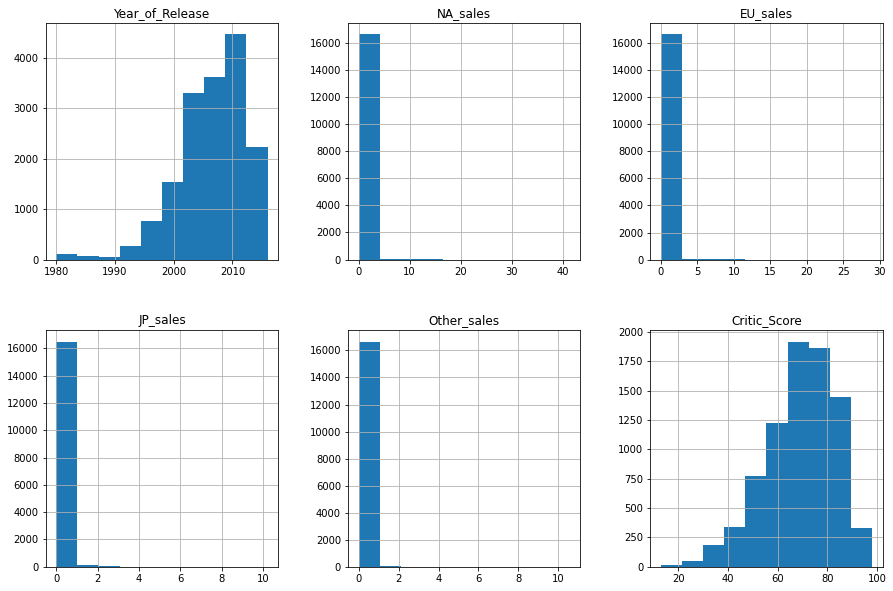

In [5]:
#строим гистограммы по всем числовым столбцам таблицы

df.hist(figsize=(15, 10),layout=(2, 3))
plt.show();

По гисто на первый взягляд всё ок, столбцы продаж укзаывают на неподходящий масштаб графиков: продажи исчисляются 
в миллионах копий, вероятно подавляющее число копий было продано в пределах одного миллиона.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Просмотрел весь раздел, но не нашел проверки явных дубликатов. Если мы это сделали, но потом код удалили, то это не совсем правильно, пусть все знают, что мы тщательно анализируем данные.</font>

</font><font color='Blue'><b>Добавил проверку дубликатов</b></font><br>

In [6]:
# подсчёт явных дубликатов
df.duplicated().sum()

0

**Выводы**

В каждой строке таблицы — данные о продажах игры. В колонках описание самой игры, её продаж и оценки. 

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

* Заменим названия столбцов (приведем к нижнему регистру);
* Преобразуем данные в нужные типы;
* Обработаем пропуски при необходимости;
* Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

### Стиль заголовков

In [7]:
# перечень названий столбцов таблицы df
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
# приводим все заголовки к нижнему регистру
df.columns= df.columns.str.lower()

In [9]:
# проверка, что всё ок
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [10]:
# подсчёт пропусков
df.isna().sum()
#pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
df[df['name'].isna()].head()
df[df['genre'].isna()].head()

# две строчки с пропусками в столбцах name и genre удаляем, 
# т.к. информацию в них восстановить не получится, а данные без них станут чище.

df = df.dropna (subset=['name'])
#df

In [12]:
df[df['year_of_release'].isna()].head()
# эти пропуски можно заполнить, узнав в каком году был релиз игры на платформе,
# таким образом обогатив датафрейм данными,
# но в целях экономии времени делать этого не будем.

name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2              NaN    Sports      4.26   
377            FIFA Soccer 2004      PS2              NaN    Sports      0.59   
456  LEGO Batman: The Videogame      Wii              NaN    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2              NaN  Fighting      1.57   
609              Space Invaders     2600              NaN   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0        8.5      E  
377      2.36      0.04         0.51          84.0        6.4      E  
456      0.97      0.00         0.29          74.0        7.9   E10+  
475      1.02      0.00         0.41           NaN        NaN    NaN  
609      0.14      0.00         0.03           NaN        NaN    NaN

In [13]:
df[df['critic_score'].isna()].head()
df[df['user_score'].isna()].head()
df[df['rating'].isna()].head()
# пропуски в столбцах с оценками и рейтингом упущение существенное, но невосполнимое, оставляем их как есть.

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES           1985.0      Platform   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
9                  Duck Hunt      NES           1984.0       Shooter   
10                Nintendogs       DS           2005.0    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN        NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN        NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN        NaN    NaN

In [14]:
df.query('user_score == "tbd"')
# to be determined так и не были уточнены, поэтому приводим их NaN в следующем шаге.

name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119        Sports      3.45      2.59       0.0         0.66           NaN   
301          Misc      2.08      1.35       0.0         0.54          61.0   
520        Sports      1.51      1.03       0.0         0.27           NaN   
645          Misc      1.65      0.57       0.0         0.20          71.0   
657     Adventure      2.15      0.18       0.0         0.07          73.0   
...           ...       ...       ...       ...          ...           ...   
16695      Action      0.01      0.00       0.0         0.00          67.0   
16697      Puzzle      0.01      0.00       0.0         0.00          53.0   
16698      Puzzle      0.01      0.00       0.0         0.00          48.0   
16704  Simulation      0.01      0.00       0.0         0.00           NaN   
16706     Shooter      0.01      0.00       0.0         0.00           NaN   

      user_score rating  
119          tbd      E  
301          tbd   E10+  
520          tbd      T  
645          tbd      E  
657          tbd      E  
...          ...    ...  
16695        tbd      E  
16697        tbd      E  
16698        tbd      E  
16704        tbd      E  
16706        tbd      T  

[2424 rows x 11 columns]

### Преобразование типов данных

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


В столбце `year_of_release` формат стоит заменить на целочисленный, а в `user_score` на числа с плавающей точкой потому что это соответсвует логике содержащихся в них данных.

In [16]:
#df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce', downcast='integer')
# более-менее нормальный способ изменить year_of_release на целочисленный формат пока необнаружен, поэтому так:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
# если errors='coerce', то некорректные значения принудительно заменяются на NaN;

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


### Подсчёт суммарных продаж по всем регионам

In [18]:
#df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['global_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   global_sales  
0         82.54  
1         40.24  
2         35.52  
3         32.77  
4         31.38

***
Теперь когда мы привели названия столбцов к единому виду, обработали пропуски, преобразовали типы данных и подсчитали суммарные продажи по регионам, можем считать, что данные подготовлены к исследовательскому анализу.
***

In [19]:
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  global_sales     16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

In [20]:
df['rating'] = df['rating'].fillna('ESRB')
print(df['rating'].sort_values().unique())
print(': кол-во NaN',df['rating'].isna().sum(),
        ', процент NaN', round(df['rating'].isna().sum()/len(df)*100, 2),'%')

['AO' 'E' 'E10+' 'EC' 'ESRB' 'K-A' 'M' 'RP' 'T']
: кол-во NaN 0 , процент NaN 0.0 %


In [21]:
df = df.dropna (subset=['year_of_release'])
print(df['year_of_release'].sort_values().unique())
print(': кол-во NaN',df['year_of_release'].isna().sum(),
        ', процент NaN', round(df['year_of_release'].isna().sum()/len(df)*100, 2),'%')

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Length: 37, dtype: Int64
: кол-во NaN 0 , процент NaN 0.0 %


Год релиза решено удалить, потому что в данном проекте необходимо определить актуальный период, на основании которого мы и будем делать прогнозы на 2017 год. Соответственно, мы все равно будем сокращать датасет, фильтруя по году релиза. А можно провести анализ, сколько пропусков года релиза приходится на платформы, которые например к 2000 году уже вышли с рынка, то есть для прогноза на 2017 год мы их явно учитывать не будем.

## Исследовательский анализ

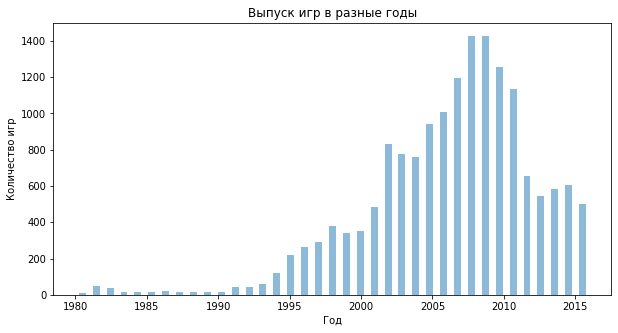

In [22]:
# узнаём, сколько лет есть в данных, значение подставим в bins графика
df['year_of_release'].nunique()

df['year_of_release'].plot(kind='hist', bins=37, alpha=0.5, rwidth=0.5, figsize=(10,5))
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.title('Выпуск игр в разные годы')
plt.show()


***
В 2012 мы можем видеть резкий спад выпуска новых игр, да и в целом игры это продукт, который меняется, поэтому логично будет ограничить данные именно по 2012 году, таким образом анализируя период за 4 года: 2012-2016.
***

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам, чтобы ответить на вопрос: за какой характерный срок появляются новые и исчезают старые платформы?

In [23]:
# считаем число проданных и вышедших игр по платформам
platforms_df = df.groupby('platform')[['global_sales']].sum().join(
    df.groupby('platform')[['name']].count()
)
platforms_df.columns = ['global_sales', 'number_of_names']
platforms_df.sort_values('global_sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.global_sales,
    name='global_Sales'
)

#trace1 = go.Bar(
#    x=platforms_df.index,
#    y=platforms_df.number_of_names,
#    name='number of games released'
#)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0]
layout = {'title': 'Доля платформ по проданным играм 1980-2016', 'xaxis': {'title': 'платформа'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

На отрезке в дестяилетия, видим лидерство PS2, X360, PS3, Wii, DS, PS. В Целом, какими бы легендарными не были эти платформы, они уже старички, поэтому ограничим свой горизонт 2012 годом

In [24]:
# считаем число проданных и вышедших игр по платформам
platforms_df = df[df['year_of_release']>=2012].groupby('platform')[['global_sales']].sum().join(
    df.groupby('platform')[['name']].count()
)
platforms_df.columns = ['global_sales', 'number_of_names']
platforms_df.sort_values('global_sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.global_sales,
    name='global_Sales'
)

#trace1 = go.Bar(
#    x=platforms_df.index,
#    y=platforms_df.number_of_names,
#    name='number of games released'
#)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0]
layout = {'title': 'Доля платформ по проданным играм 2012-2016', 'xaxis': {'title': 'платформа'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Отмечаем лидерство следующих платформ: PS4, PS3, X360, 3DS, XOne, WiiU.

In [25]:
top6_df = df[df['year_of_release']>=2012].query(
    "platform == ['PS4', 'PS3', 'X360','3DS', 'XOne', 'WiiU']").groupby(
    ['platform','year_of_release'])[['global_sales']].sum().join(
    df.groupby('year_of_release')[['name']].count()
)
top6_df.columns = ['Global_Sales', 'Number_of_Games']
top6_df


Global_Sales  Number_of_Games
platform year_of_release                               
3DS      2012                    51.36              653
         2013                    56.57              544
         2014                    43.76              581
         2015                    27.78              606
         2016                    15.14              502
PS3      2012                   107.36              653
         2013                   113.25              544
         2014                    47.76              581
         2015                    16.82              606
         2016                     3.60              502
PS4      2013                    25.99              544
         2014                   100.00              581
         2015                   118.90              606
         2016                    69.25              502
WiiU     2012                    17.56              653
         2013                    21.65              544
         2014                    22.03              581
         2015                    16.35              606
         2016                     4.60              502
X360     2012                    99.74              653
         2013                    88.58              544
         2014                    34.74              581
         2015                    11.96              606
         2016                     1.52              502
XOne     2013                    18.96              544
         2014                    54.07              581
         2015                    60.14              606
         2016                    26.15              502

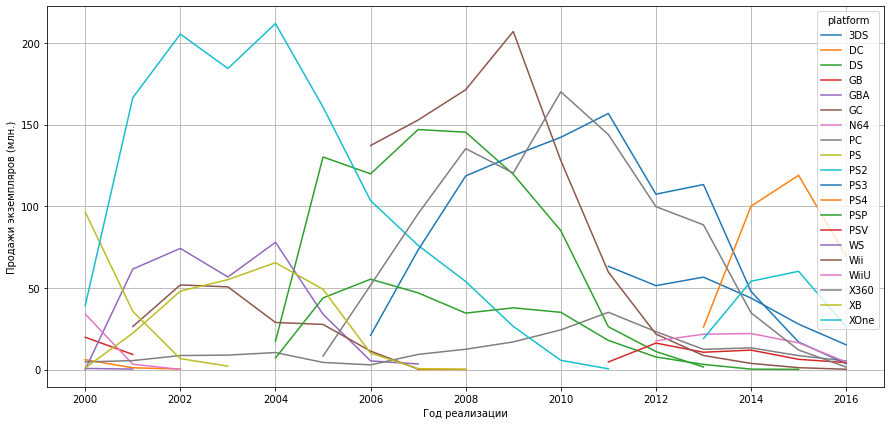

In [26]:
# оставим в выгрузке последние 16 лет и запишем в новую переменную
long_live_df = df.query("2000 <= year_of_release")
#data_platform_max_sales_2016 = data_2012_2016.query("platform == ['PS4', 'PS3', 'X360','3DS', 'XOne', 'WiiU']")
long_live_df.pivot_table(index='year_of_release', 
                                         columns = 'platform', 
                                         values='global_sales', 
                                         aggfunc='sum').plot(grid=True, figsize=(15, 7))
# меняем наименование горизонтальной линии ('X')
plt.xlabel('Год реализации')
# меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Вывод**:

Т.н. седьмое поколение консолей -X360 и PS3- самое живучее:  8-10 лет. Актуальное поколение, т.е. PS4 и XOne живут около 5 лет, нишевые консоли как WiiU и 3DS имеют схожий срок жизни 4-5 лет.

Актуальным период в данных будем считать период 2012-2016гг.

В целом, продажи по всем плтаформам снижаются после 2015 года, вероятно, дело в том, что данные за 2016 не полные.

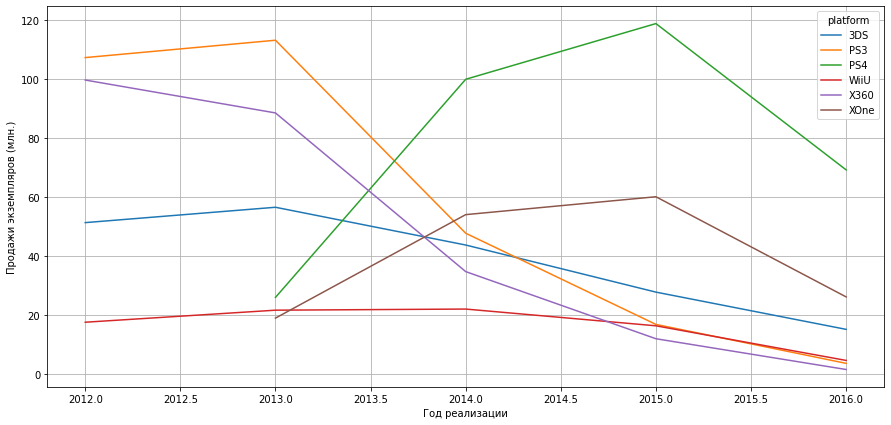

In [27]:
# оставим в выгрузке только 3 последние года и запишем в новую переменную
df_2012_2016 = df.query("2012 <= year_of_release")
df_platform_max_sales_2016 = df_2012_2016.query("platform == ['PS4', 'PS3', 'X360','3DS', 'XOne', 'WiiU']")
df_platform_max_sales_2016.pivot_table(index='year_of_release', 
                                         columns = 'platform', 
                                         values='global_sales', 
                                         aggfunc='sum').plot(grid=True, figsize=(15, 7))
# меняем наименование горизонтальной линии ('X')
plt.xlabel('Год реализации')
# меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Платформы, которые лидируют по продажам: 'PS4', 'XOne', '3DS'. Потецниально прибыльные платформы, которые лидируют по продажам: 'PS4', 'PS3', 'X360','3DS', 'XOne', 'WiiU'.

Строим ещё и ящик с усами по лидерам продаж, определенным выше.

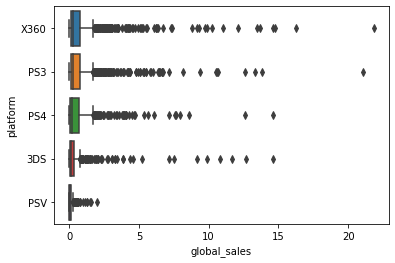

In [28]:
top_platforms = df_2012_2016.platform.value_counts().sort_values(ascending = False).head(5).index.values
gfg = sns.boxplot(y='platform', x='global_sales', data=df[df.platform.isin(top_platforms)], orient="h")
plt.show()

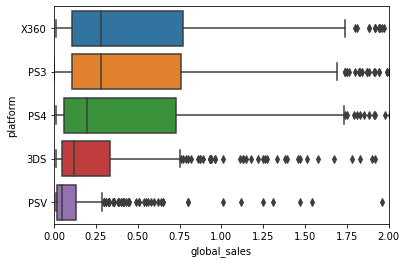

In [29]:
top_platforms = df_2012_2016.platform.value_counts().sort_values(ascending = False).head(5).index.values
gfg = sns.boxplot(y='platform', x='global_sales', data=df[df.platform.isin(top_platforms)], orient="h")
gfg.set_xlim(0, 2)
plt.show()

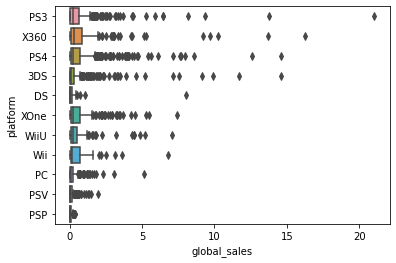

In [30]:
gfg = sns.boxplot(y='platform', x='global_sales', data=df_2012_2016, orient="h")
plt.show()

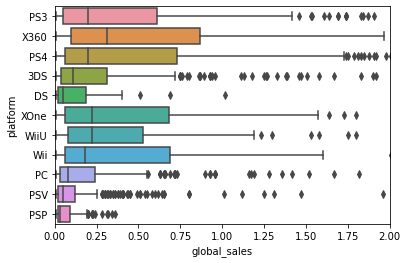

In [31]:
gfg = sns.boxplot(y='platform', x='global_sales', data=df_2012_2016, orient="h")
gfg.set_xlim(0, 2)
plt.show()

***
**Вывод**:

График подтвертждает выводы выше и убеждает в корректном выборе ряда платформ.
***

Посмотрим, как влияют на продажи внутри одной популярной платформы, например PS4, отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

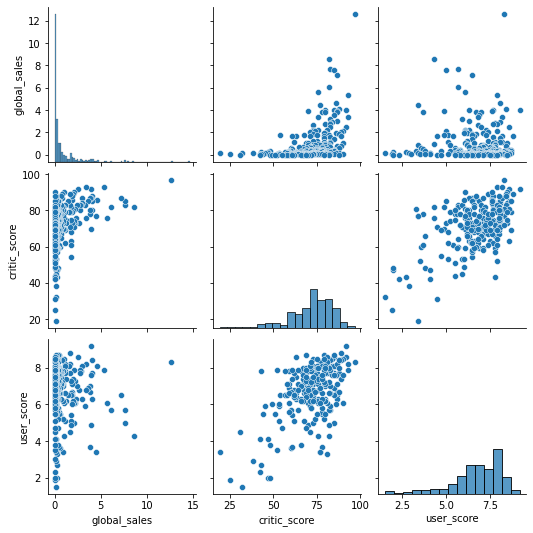

In [32]:
sns_plot = sns.pairplot(df_2012_2016.query('platform == "PS4"')
                        [['global_sales', 'critic_score', 'user_score']]
                       )
sns_plot.savefig('pairplot.png')

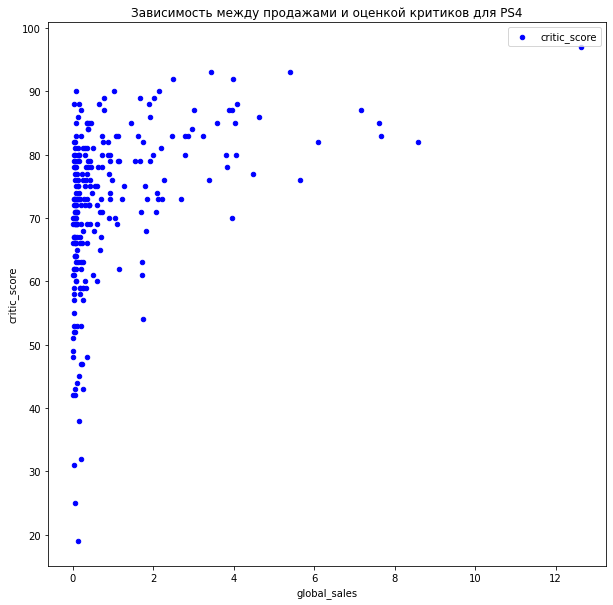

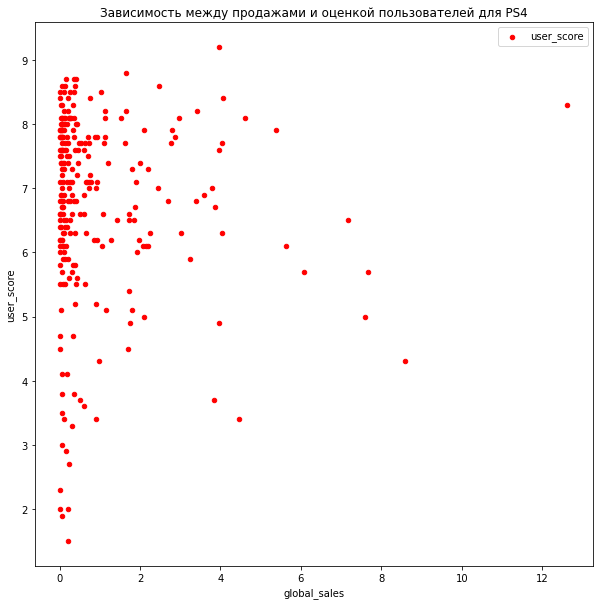

In [33]:
#sns_plot = sns.pairplot(df_2012_2016.query('platform == "PS4"')
#                        [['global_sales', 'critic_score', 'user_score']]
#                       )
df_2012_2016.query('platform == "PS4"').plot(kind='scatter', x='global_sales', y='critic_score', 
                                             figsize=(10, 10), color='blue', label='critic_score')
plt.title('Зависимость между продажами и оценкой критиков для PS4')

df_2012_2016.query('platform == "PS4"').plot(kind='scatter', x='global_sales', y='user_score', 
                                             figsize=(10, 10), color='red', label='user_score')
plt.title('Зависимость между продажами и оценкой пользователей для PS4')
corr = df_2012_2016.query('platform == "PS4"')[['global_sales', 'critic_score', 'user_score']].corr()
corr.style.background_gradient(cmap='coolwarm')

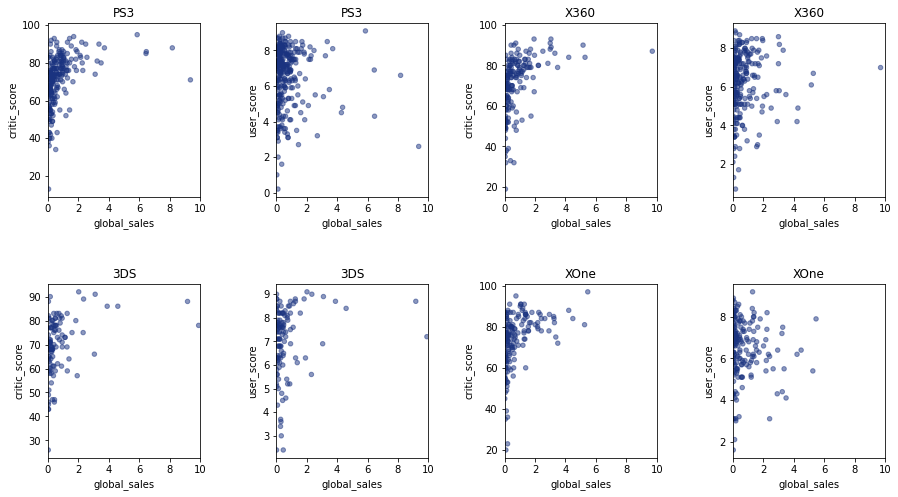

In [34]:
platforms = ['PS3', 'X360','3DS', 'XOne']
fig = plt.figure(figsize = (15,8))
fig.subplots_adjust(wspace=0.5, hspace = 0.5)
с=0

for i in platforms:
    df_2 = df_2012_2016.query('platform == @i')
    с+=1
    sub = fig.add_subplot(2,4,с)
    st = df_2.plot(x='global_sales', y='critic_score', kind='scatter', alpha=0.5,
                   ax=sub, c= np.repeat(np.atleast_2d(np.array([0.1, 0.2, 0.5])), len(df_2), axis = 0))
    с+=1
    sub = fig.add_subplot(2,4,с)
    ax = df_2.plot(x='global_sales', y='user_score', kind='scatter', alpha=0.5,
                   ax=sub, c= np.repeat(np.atleast_2d(np.array([0.1, 0.2, 0.5])), len(df_2), axis = 0))
    st.set_xlim(0,10)
    st.set_title(i)
    ax.set_xlim(0,10)
    ax.set_title(i)
    
plt.show()

In [35]:
corr = df_2012_2016.query('platform == "PS3"')[['global_sales', 'critic_score', 'user_score']].corr()
corr.style.background_gradient(cmap='coolwarm')

In [36]:
corr = df_2012_2016.query('platform == "X360"')[['global_sales', 'critic_score', 'user_score']].corr()
corr.style.background_gradient(cmap='coolwarm')

In [37]:
corr = df_2012_2016.query('platform == "3DS"')[['global_sales', 'critic_score', 'user_score']].corr()
corr.style.background_gradient(cmap='coolwarm')

In [38]:
corr = df_2012_2016.query('platform == "XOne"')[['global_sales', 'critic_score', 'user_score']].corr()
corr.style.background_gradient(cmap='coolwarm')

**Вывод**:

И графика и цифры говорят об одном: корреляция по всем показателям очень слабая.

In [39]:
# строим таблицу с общим распределением игр по жанрам в период 2012-2016гг.
genres_df = df_2012_2016.groupby('genre').agg({'global_sales': ['sum', 'median'], 'name':['count']})

genres_df.columns = ['global_sales', 'median', 'number_of_names']
genres_df.sort_values('global_sales', ascending=False, inplace=True)
genres_df['ratio'] = genres_df['global_sales']/genres_df['number_of_names']
genres_df.style.background_gradient(cmap='coolwarm')

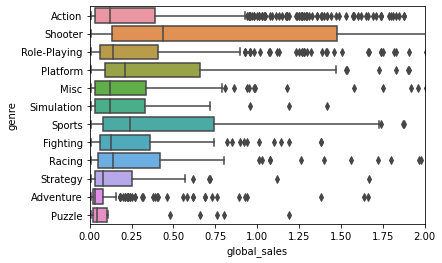

In [40]:
gfg = sns.boxplot(y='genre', x='global_sales', data=df_2012_2016, orient="h")
gfg.set_xlim(0, 2)
plt.show()

**Вывод**:

По таблице и диаграмме размаха можно сказать, что самый прибыльный жанр это `Action`, меньше всего прибыли принес жанр `Puzzle`. В столбце `median` сравниваем медианные продажи. Для интереса построили столбец `ratio`, чтобы увидеть, сколько прибыли в среднем приносит одна игра в жанре. Так можно увидеть, что не смотря на то, что `Shooter` количественно в три раза меньше, одна игра этого жанра в среднем приносит почти в три раза больше чем `Action`.

***
***
**Вывод по разделу**:

В ходе исследовательского анализа выделили следующие наблюдения:
1. В 2012 мы увидели резкий спад выпуска новых игр, таким образом анализ произведён за период 4 года: 2012-2016.

2. В среднем срок жизни седьмого поколения консолей `X360` и `PS3` самое живучее:  8-10 лет. Актуальное поколение, т.е. `PS4` и `XOne` живут около 5 лет.

3. Выделены платформы, которые лидируют по продажам: 'PS4', 'XOne', '3DS' и потецниально прибыльные платформы: 'PS4', 'PS3', 'X360','3DS', 'XOne', 'WiiU'.

4. Корреляция между глобальными продажами и оценкой критиков и игроков не обнаружена.

5. Самый прибыльный жанр это `Action`, меньше всего прибыли принес жанр `Puzzle`. В среднем, самые прибыльные игры в жанре `Shooter`.
***
***

## Портрет пользователя в каждом регионе

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5);
* Самые популярные жанры (топ-5);
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [41]:
# топ-5 популярных платформ NA
df_NA = df_2012_2016.groupby('platform').agg({'na_sales': ['sum'], 'name':['count']})

df_NA.columns = ['na_sales', 'number_of_names']
df_NA.sort_values('na_sales', ascending=False, inplace=True)
df_NA.head()

na_sales  number_of_names
platform                           
X360        140.05              292
PS4         108.74              392
PS3         103.38              493
XOne         93.12              247
3DS          55.31              396

In [42]:
# топ-5 популярных платформ EU
df_EU = df_2012_2016.groupby('platform').agg({'eu_sales': ['sum'], 'name':['count']})

df_EU.columns = ['eu_sales', 'number_of_names']
df_EU.sort_values('eu_sales', ascending=False, inplace=True)
df_EU.head()

eu_sales  number_of_names
platform                           
PS4         141.09              392
PS3         106.86              493
X360         74.52              292
XOne         51.59              247
3DS          42.64              396

In [43]:
# топ-5 популярных платформ JP
df_JP = df_2012_2016.groupby('platform').agg({'jp_sales': ['sum'], 'name':['count']})

df_JP.columns = ['jp_sales', 'number_of_names']
df_JP.sort_values('jp_sales', ascending=False, inplace=True)
df_JP.head()

jp_sales  number_of_names
platform                           
3DS          87.79              396
PS3          35.29              493
PSV          21.04              411
PS4          15.96              392
WiiU         13.01              147

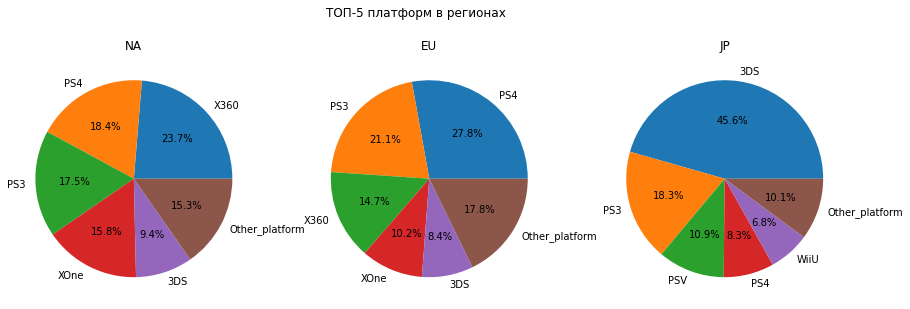

In [44]:
platforms_fresh = df_2012_2016.copy()
countries = platforms_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (platforms_fresh.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'platform': 'Other_platform', countries[i]: platforms_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

***
**Вывод**:

Лидерство X360 в Америке и 3DS в Японии можно объяснить страной происхожждения этих платформ. Этим же объясняется отсутствие в топ5 американских консолей на японском рынке. Лидерство 3DS наводит на мысль, что выбирать потенциально прибыльный продукт и планировать рекламные кампании необходимо с учётом географии рынка.
***

In [45]:
# топ-5 популярных жанров NA
df_NA = df_2012_2016.groupby('genre').agg({'na_sales': ['sum'], 'name':['count']})

df_NA.columns = ['na_sales', 'number_of_names']
df_NA.sort_values('na_sales', ascending=False, inplace=True)
df_NA.head()

na_sales  number_of_names
genre                                  
Action          177.84             1031
Shooter         144.77              235
Sports           81.53              268
Role-Playing     64.00              370
Misc             38.19              192

In [46]:
# топ-5 популярных жанров EU
df_EU = df_2012_2016.groupby('genre').agg({'eu_sales': ['sum'], 'name':['count']})

df_EU.columns = ['eu_sales', 'number_of_names']
df_EU.sort_values('eu_sales', ascending=False, inplace=True)
df_EU.head()

eu_sales  number_of_names
genre                                  
Action          159.34             1031
Shooter         113.47              235
Sports           69.09              268
Role-Playing     48.53              370
Racing           27.29              115

In [47]:
# топ-5 популярных жанров JP
df_JP = df_2012_2016.groupby('genre').agg({'jp_sales': ['sum'], 'name':['count']})

df_JP.columns = ['jp_sales', 'number_of_names']
df_JP.sort_values('jp_sales', ascending=False, inplace=True)
df_JP.head()

jp_sales  number_of_names
genre                                  
Role-Playing     65.44              370
Action           52.80             1031
Misc             12.86              192
Simulation       10.41               80
Fighting          9.44              109

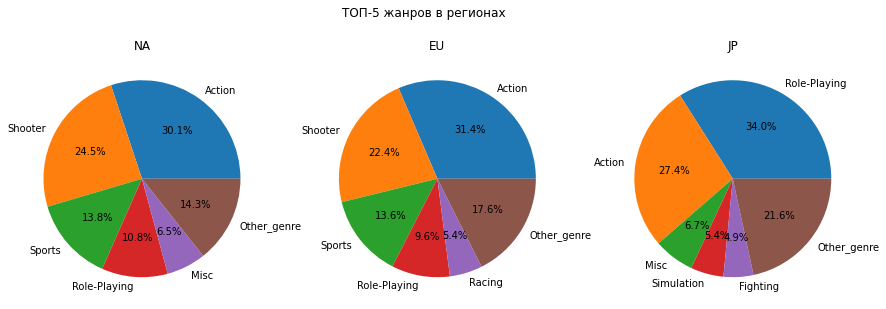

In [48]:
games_fresh = df_2012_2016.copy()
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

***
При анализе популярности жанров и платформ по регионам выделяется японский рынок, при этом EU и NA практически идентичны как по категориям, так и пропорционально.
***

In [49]:
# посмотрим, как влияет рейтинг ESRB на продажи в отдельном регионе
df_rating = df_2012_2016.groupby('rating').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})

df_rating.columns = ['na_sales', 'eu_sales', 'jp_sales']
df_rating.head().style.background_gradient(cmap='coolwarm')

**Вывод по разделу**:

Расшифровка рейтингов:
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.

Можем сделать вывод, что в регионах **NA** и **EU** игры с рейтином `M` продаются лучше других. А в **Японии** свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данных и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.

***
В целом, можно составить три портрета пользователя по регионам:
* EU: платформа X360, жанр Action, рейтинг M;
* NA: платформа PS4, жанр Action, рейтинг M;
* JP: платформа 3DS, жанр Role-Playing;

***

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

```
H_0: Средние пользовательские рейтинги (user_score) платформ Xbox One и PC одинаковые;
H_a: Средние пользовательские рейтинги (user_score) платформ Xbox One и PC различаются;
alpha = 0.05
```
Нулевая гипотеза сформулированна исходя из самого простого и наименнее дерзкого предположения. Альтернативная гипотеза, соответсвенно, альтернативна нулевой.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяем
метод `scipy.stats.ttest_ind()`.

Так как выборки взяты из схожих по параметрам совокупностей, то equal_var = True , а т.к. по умполчанию он и так True, то этот парметр вовсе не будем указывать.

In [50]:
# results = вызов метода для проверки гипотезы
results = stats.ttest_ind(
    df_2012_2016[df_2012_2016['platform'] =='XOne']['user_score'].dropna(), 
    df_2012_2016[df_2012_2016['platform'] =='PC']['user_score'].dropna(),
    equal_var = False
)

# alpha уровень значимости
alpha = .05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [51]:
# results = вызов метода для проверки гипотезы
results = stats.ttest_ind(
    df_2012_2016[df_2012_2016['platform'] =='XOne']['user_score'].dropna(), 
    df_2012_2016[df_2012_2016['platform'] =='PC']['user_score'].dropna(),
)

# alpha уровень значимости
alpha = .05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


На этом этапе возникли сомнения насчёт параметра equal_var, поэтому сравниваем дисперсии двух выборок. Как мне кажется, их можно считать схожими, но всё равно повторим результат с параметрым `= False`.

In [52]:
df_2012_2016[df_2012_2016['platform'] =='XOne']['user_score'].dropna().var(), df_2012_2016[df_2012_2016['platform'] =='PC']['user_score'].dropna().var()

(1.9069968429360695, 2.770443997158418)

In [53]:
# results = вызов метода для проверки гипотезы
results = stats.ttest_ind(
    df_2012_2016[df_2012_2016['platform'] =='XOne']['user_score'].dropna(), 
    df_2012_2016[df_2012_2016['platform'] =='PC']['user_score'].dropna(),
    equal_var = False
)

# alpha уровень значимости
alpha = .05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Разница получилась несущественной, продолжаем использовать equal_var = True

**Вывод**:
    
На имеющихся данных, на уровне значимости 5% мы не можем отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) платформ Xbox One и PC в пользу альтернативной гипотезы.

### Средние пользовательские рейтинги жанров Action и Sports разные?

```
H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
H_a: Средние пользовательские рейтинги жанров Action и Sports различаются
alpha = 0.05
```

In [54]:
# results = вызов метода для проверки гипотезы
results = stats.ttest_ind(
    df_2012_2016[df_2012_2016['genre'] =='Action']['user_score'].dropna(), 
    df_2012_2016[df_2012_2016['genre'] =='Sports']['user_score'].dropna(),
    equal_var = False
)

# alpha уровень значимости
alpha = .05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

4.24307776572644e-20
Отвергаем нулевую гипотезу


**Вывод**:
    
На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

***
**Вывод по разделу**:

Нулевая гипотеза сформулированна исходя из самого простого и наименнее дерзкого предположения. Альтернативная гипотеза, соответсвенно, альтернативна нулевой.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяем
метод `scipy.stats.ttest_ind()`.

На имеющихся данных, на уровне значимости 5% мы не можем отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) платформ Xbox One и PC, однако, есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.
***

## Общий вывод

В ходе исследование пройдены следующие шаги:
* 1. Изучение общей информации в файле
* 2. Подготовка данных
* 3. Проведение исследовательского анализа данных
* 4. Составление портрета пользователя каждого региона
* 5. Проверка гипотезы

***
**Цель** была выявить определяющие успешность игры закономерности.
***

В ходе исследовательского анализа выделили следующие наблюдения:
1. В 2012 увидели резкий спад выпуска новых игр.

2. В среднем срок жизни платформ `X360` и `PS3`:  8-10 лет. Актуальное поколение, т.е. `PS4` и `XOne` живут около 5 лет.

3. Выделены лидиры продаж среди платформ: 'PS4', 'XOne', '3DS' и 

4. И потецниально прибыльные платформы: 'PS4', 'PS3', 'X360','3DS', 'XOne', 'WiiU'.

5. Корреляция между глобальными продажами и оценкой критиков и игроков не обнаружена.

5. Самый прибыльный жанр это `Action`, меньше всего прибыли принес жанр `Puzzle`. В среднем, самые прибыльные игры в жанре `Shooter`.
***
***
Составили три портрета пользователя по регионам:
* EU: платформа X360, жанр Action, рейтинг M
* NA: платформа PS4, жанр Action, рейтинг M
* JP: платформа 3DS, жанр Role-Playing, рейтинг E

***
Узнали, что средние пользовательские рейтинги (user_score) платформ Xbox One и PC одинаковые,

а средние пользовательские рейтинги жанров Action и Sports различаются
***
Исходя из проведенного анализа можно сдлеать ставку на следующие проудкты. 
* Для EU: платформа X360 или PS4, жанр Action или Shooter, рейтинг M
* Для NA: платформа PS4 или PS3, жанр Action или Shooter, рейтинг M
* Для JP: платформа 3DS, жанр Role-Playing или Action, без рейтинга ESRB

***
